### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [50]:
import pandas as pd

In [51]:
df=pd.read_csv('../../data/fake-news/train.csv')

In [52]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [53]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [54]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [55]:
## Get the Dependent features
y=df['label']

In [56]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [57]:
df.shape

(20800, 5)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [59]:
df=df.dropna()

In [60]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [61]:
messages=df.copy()

In [62]:
messages.reset_index(inplace=True)

In [63]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [64]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [65]:
import os.path
from os import path
if(path.exists("../../data/fake-news/corpus.txt")):
    my_file = open("../../data/fake-news/corpus.txt", "r")
    corpus = my_file.readlines()
else:
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    import re
    import nltk
    nltk.download('stopwords')

    ps = PorterStemmer()
    corpus = []
    for i in range(0, len(messages)):
        review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
        review = review.lower()
        review = review.split()
    
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
        print(f'completed {i+1} of {len(messages)}')

In [66]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [67]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [19]:
X.shape

(18285, 5000)

In [68]:
y=messages['label']

In [69]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [70]:
cv.get_feature_names()[:20]

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [71]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [25]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [28]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [29]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.898
Confusion matrix, without normalization


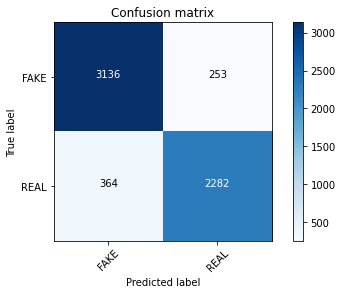

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8977630488815245

In [32]:
y_train.shape

(12250,)

### Passive Aggressive Classifier Algorithm

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.935
Confusion matrix, without normalization


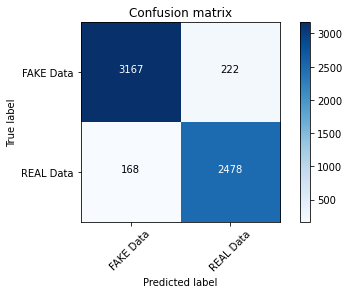

In [34]:
linear_clf.fit(X_train, y_train)#train the model
pred = linear_clf.predict(X_test)#test trained model against
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [35]:
classifier=MultinomialNB(alpha=0.1)

In [36]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Python38\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.8990886495443248
Alpha: 0.1, Score : 0.8984258492129246
Alpha: 0.2, Score : 0.8980944490472246
Alpha: 0.30000000000000004, Score : 0.8980944490472246
Alpha: 0.4, Score : 0.8982601491300746
Alpha: 0.5, Score : 0.8982601491300746
Alpha: 0.6000000000000001, Score : 0.8980944490472246
Alpha: 0.7000000000000001, Score : 0.8980944490472246
Alpha: 0.8, Score : 0.8979287489643745
Alpha: 0.9, Score : 0.8977630488815245


In [37]:
## Get Features names
feature_names = cv.get_feature_names()

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
classifier.coef_[0]

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-10.64736682,  -9.14151929,  -9.27080072, ...,  -9.00037421,
        -8.2432783 ,  -9.36731922])

In [39]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.07303253773893, 'trump'),
 (-5.105085437987942, 'clinton'),
 (-5.251784261236111, 'peopl'),
 (-5.262171914498623, 'one'),
 (-5.320431007386073, 'state'),
 (-5.396167328676395, 'us'),
 (-5.4061261362665025, 'would'),
 (-5.518843883055082, 'like'),
 (-5.529973356366376, 'hillari'),
 (-5.554147807629837, 'time'),
 (-5.632957338144276, 'elect'),
 (-5.643298220146336, 'year'),
 (-5.697315338301843, 'said'),
 (-5.707695100317027, 'american'),
 (-5.770432150798351, 'new'),
 (-5.812260715607884, 'use'),
 (-5.818433686788502, 'also'),
 (-5.822448363981332, 'presid'),
 (-5.845944468368517, 'world'),
 (-5.8506354365533255, 'go')]

In [40]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-14.534641657940355, 'brief post'),
 (-14.534641657940355, 'follow pam'),
 (-14.534641657940355, 'follow pam key'),
 (-14.534641657940355, 'gold medal'),
 (-14.534641657940355, 'gorsuch'),
 (-14.534641657940355, 'judg gorsuch'),
 (-14.534641657940355, 'key twitter'),
 (-14.534641657940355, 'key twitter pamkeynen'),
 (-14.534641657940355, 'morn brief'),
 (-14.534641657940355, 'mr ail'),
 (-14.534641657940355, 'mr bannon'),
 (-14.534641657940355, 'mr castro'),
 (-14.534641657940355, 'mr christi'),
 (-14.534641657940355, 'mr cruz'),
 (-14.534641657940355, 'mr de'),
 (-14.534641657940355, 'mr flynn'),
 (-14.534641657940355, 'mr kushner'),
 (-14.534641657940355, 'mr roof'),
 (-14.534641657940355, 'mr sander'),
 (-14.534641657940355, 'mr scott'),
 (-14.534641657940355, 'mr session'),
 (-14.534641657940355, 'mr spicer'),
 (-14.534641657940355, 'mr xi'),
 (-14.534641657940355, 'ms trump'),
 (-14.534641657940355, 'pam key'),
 (-14.534641657940355, 'pam key twitter'),
 (-14.534641657940355, 'p

In [85]:

#classifier.predict(['Manchester united lose 4 -1 to city'])
#testc = cv.fit_transform(['Manchester united lose 4-1 to city']).toarray()
#countc = pd.DataFrame(testc, columns=cv.get_feature_names())
#countc.head
#classifier.predict(countc)
#print(cv.get_feature_names())
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

import nltk
nltk.download('stopwords')

#print(X_test)

def checkMessage(msg):
    msgs = cv.get_feature_names()
    ps = PorterStemmer()
    cv2 = CountVectorizer(max_features=5000,ngram_range=(1,3))
    review = re.sub('[^a-zA-Z]', ' ', msg)
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    msgs.append(review)
    tempX = cv2.fit_transform(msgs).toarray()
    df2 = pd.DataFrame(tempX,
                   columns=cv.get_feature_names())
    
    #print(df2.iloc[-1])

    return classifier.predict([df2.iloc[-1]])

print("result:   %0.3f" % checkMessage('Manchester united lose 4-1 to Manchester city'))



result:   0.000


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
